In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

In [3]:
from algorithmic_complexity.aclib import graphstuff as gs
import pandas as pd
import numpy as np
import networkx as nx
import math

In [ ]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)
nomprovincias = poblacionesDF['PROVINCIA'].unique()
print(len(poblacionesDF))
poblacionesDF.head()


In [12]:
def distancia(cp1,cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  return round(math.sqrt((x1 - x2)**2 + (y1 - y2)**2),4)

In [9]:
#Almacenando provincias
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  #print(nom, len(provincias[nom]))


#ALGORITMO TSP

#Calculando ruta menor mediante Backtracking

def tsp(graph,distrito):

	costos = []
	recorridos=[]
	n = len(distrito)
	recorrido=[]
	visited = [False for i in range(n)]
	visited[0] = True
	recorrido.append(graph[0][0])
	HamCycle(graph,visited,0,n,1,0,recorrido,costos,recorridos)
	minimo=min(costos)
	ind=costos.index(minimo)
	for i,recorrido in enumerate(recorridos):
		if i==ind:
			return recorrido

def HamCycle(graph, visited, currPos, n, count, cost,recorrido,costos,recorridos):
  if (count == n and graph[currPos][0][0]):
    costos.append(cost + graph[currPos][0][0])
    #se crea una copia porque la lista "recorrido" constantemente
		#está agregando y quitando valores
    prueba=recorrido.copy()
    prueba.append(graph[currPos][0])
    recorridos.append(prueba)
    return


  for i in range(n):
    if (visited[i] == False and graph[currPos][i][0]):		
      visited[i] = True
      recorrido.append(graph[currPos][i])
      HamCycle(graph, visited, i, n, count + 1,
				cost + graph[currPos][i][0],recorrido,costos,recorridos)
      recorrido.pop()
      visited[i] = False

#INGRESO DE DATOS

#Pidiendo al usuario que ingrese una provincia
nom_provincia=input("Ingresa el nombre de la provincia: ").upper()
#print(provincias[nom_provincia]['DISTRITO'])


#Almacenando los distritos de X provincia
nomdistritos = provincias[nom_provincia]['DISTRITO'].unique()

distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias[nom_provincia][provincias[nom_provincia]['DISTRITO'] == nom]
  #Mostrando la provincia y la cantidad de distritos en esa provincia
  print(nom, len(distritos[nom]))


#Pidiendo al usuario que ingrese un distrito
nom_distrito=input("Ingrese el nombre del distrito: ").upper()
distrito=distritos[nom_distrito]
print(distrito)

#MATRIZ DE CALCULO
#Definiendo matriz de calculo
Matriz=[[] for _ in range(len(distrito))]
cont1=0
cont2=0
col = 'CENTRO POBLADO'

for i, cp1 in distrito.iterrows():
  for j, cp2 in distrito.iterrows():
    if cp1[col] == cp2[col]:
      Matriz[cont1].append((0,cp2[col]))
    elif cp1[col] != cp2[col]:
      Matriz[cont1].append((distancia(cp1, cp2),cp2[col]))
    
  cont1+=1
for fil in Matriz:
  print(fil) 

#Aplicando algoritmo
RecorridoFinal=tsp(Matriz,distrito)

Ingresa el nombre de la provincia: carhuaz
ANTA 5
MARCARA 2
PARIAHUANCA 8
PARIAHUNCA 1
SAN MIGUEL DE ACO 3
TINCO 1
Ingrese el nombre del distrito: pariahuanca
   DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
39       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.570888   23   79
40       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.567633   10   35
41       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.579388   19   63
42       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.580846  191  624
43       ANCASH   CARHUAZ  PARIAHUANCA  ...   -77.58679   16   46
44       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.572123   30   82
45       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.573995   21   69
46       ANCASH   CARHUAZ  PARIAHUANCA  ...  -77.576615   26   87

[8 rows x 8 columns]
[(0, 'BELLAVISTA'), (0.008, 'ICHIC AHUAC'), (0.009, 'INDEPENDENCIA'), (0.01, 'PARIAHUANCA'), (0.016, 'PUMPUC'), (0.002, 'SAN ISIDRO'), (0.004, 'SAN MARTIN'), (0.007, 'VIRGEN DEL CARMEN')]
[(0.008, 'BELLAVISTA'), (0, 'ICHIC AH

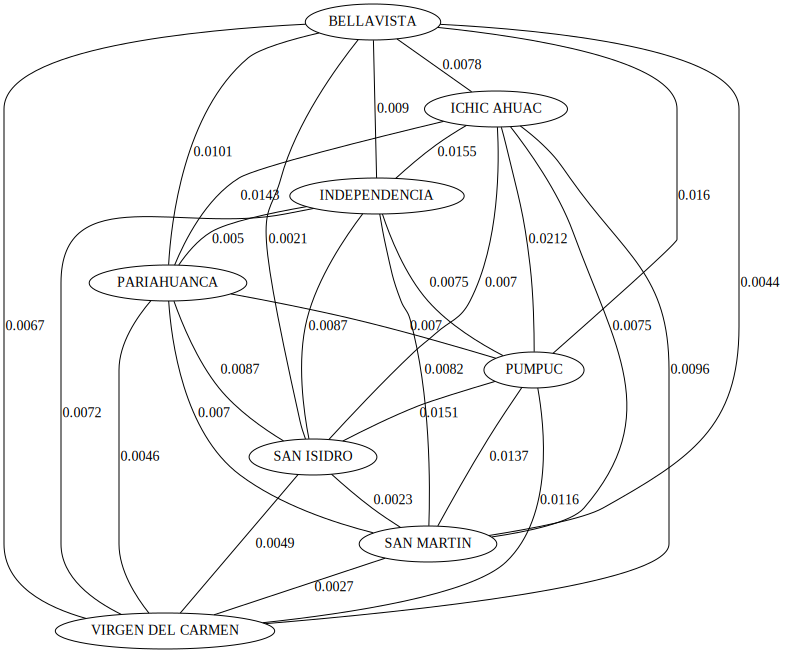

In [13]:
#Mostrando grafo inicial
G = nx.Graph()
col='CENTRO POBLADO'

for i, cp1 in distrito.iterrows():
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=distancia(cp1, cp2))

gs.nx2gv(G, weighted=True, params={'size':'15'})



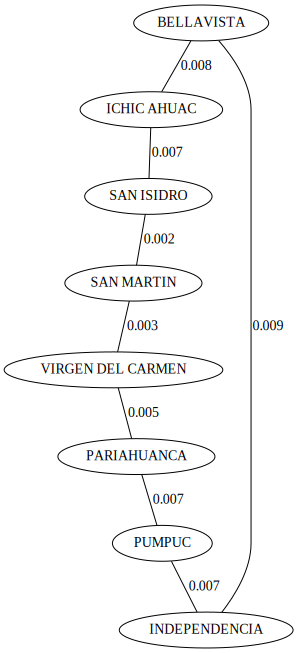

In [14]:
#Graficando Respuesta
Gr = nx.Graph()
for i,tupla in enumerate(RecorridoFinal):
  if(i<len(distrito)):
    Gr.add_edge(RecorridoFinal[i][1],RecorridoFinal[i+1][1] ,weight=RecorridoFinal[i+1][0])


gs.nx2gv(Gr, weighted=True, params={'size':'12'})